# MAUP and Spatial Prediction

## MAUP and Spatial Prediction

let's investigate how the modifiable areal unit problem (MAUP) can arise in spatial prediction modeling applications.

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','classInt','RColorBrewer','MASS','geoR')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
“no DISPLAY variable so Tk is not available”

## US Counties and County Subdivisions

As we've discussed, geographical data are often summarized in different ways for the same region. US Census is a good example of an agency that provides areal summaries at different geographic scales.  Let's look at two (counties and county subdivisions). Two datasetss (nwus/NWcounties.shp) and (nwus/NWcountysubs.shp) are provided. These data were downloaded from https://www.census.gov/geo/maps-data/data/tiger-data.html. The only modification I made was to only extract data for a few states in the northwest given the data files were rather large.  There is also a spreadsheet in the 'nwus' folder that documents the names of attributes in the datasets.

In [2]:
#Read in the featureclass
inFeaturesA <- readOGR("/dsa/data/geospatial/DS8612/nwus","NWcounties2")

inFeaturesB <- readOGR("/dsa/data/geospatial/DS8612/nwus","NWcountysubs2")

OGR data source with driver: ESRI Shapefile 
Source: "/dsa/data/geospatial/DS8612/nwus", layer: "NWcounties2"
with 138 features
It has 196 fields
OGR data source with driver: ESRI Shapefile 
Source: "/dsa/data/geospatial/DS8612/nwus", layer: "NWcountysubs2"
with 665 features
It has 196 fields


In [3]:
head(inFeaturesA@data)

,GEOID10,NAMELSAD10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,⋯,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,newid
0,56039,Teton County,A,10347983791,572265729,+44.0493205,-110.5881023,21294,1283,1090,⋯,8973,5083,3890,11969,9054,2.35,2.33,5.118661,1.2240465,51
1,49003,Box Elder County,A,14880907163,2547942103,+41.4760210,-113.0529220,49975,4972,4780,⋯,16058,12604,3454,39750,9886,3.15,2.86,6.194430,1.8800665,105
2,56023,Lincoln County,A,10557126438,49925301,+42.2287879,-110.6798417,18106,1449,1374,⋯,6861,5410,1451,14384,3651,2.66,2.52,5.563863,1.1573775,234
3,41049,Morrow County,A,5261843781,43778396,+45.4254956,-119.6023111,11173,794,853,⋯,3916,2799,1117,7945,3205,2.84,2.87,3.558612,0.6099261,269
4,53077,Yakima County,A,11125023321,41131437,+46.4565581,-120.7401446,243231,21409,20456,⋯,80592,50944,29648,151340,88406,2.97,2.98,5.872263,1.3076204,270
5,41007,Clatsop County,A,2147227903,661312521,+46.0245092,-123.7050140,37039,2076,2034,⋯,15742,9680,6062,22523,13560,2.33,2.24,2.667529,0.3262922,271


In [4]:
head(inFeaturesB@data)

,GEOID10,NAMELSAD10,CLASSFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,⋯,DP0200001,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area
0,0609390290,Butte Valley CCD,Z5,S,1300237839,72752569,+41.8591979,-121.9346590,1955,123,⋯,5.0,758,510,248,1190,763,2.33,3.08,2.081516,0.14887470
1,0609391240,Happy Camp CCD,Z5,S,3190036652,10609603,+41.7477055,-123.3041347,2142,104,⋯,6.1,978,613,365,1320,821,2.15,2.25,3.479715,0.34643879
2,0609391340,Hornbrook-Hilt CCD,Z5,S,532996191,3118234,+41.9466483,-122.6348078,652,22,⋯,6.9,311,217,94,448,202,2.06,2.15,1.346608,0.05819987
3,0609392010,Montague CCD,Z5,S,1422590327,14083193,+41.7845609,-122.2927628,4105,222,⋯,9.8,1730,1317,413,3006,1081,2.28,2.62,2.389643,0.15556946
4,0609393450,Tulelake CCD,Z5,S,859986919,44665015,+41.8189992,-121.6338007,1458,129,⋯,10.2,521,265,256,684,759,2.58,2.96,1.838726,0.09798655
5,0601593040,Smith River-Gasquet CCD,Z5,S,2100851218,180188212,+41.7356123,-123.9096887,3655,190,⋯,8.1,1564,1125,439,2508,1114,2.23,2.54,4.132383,0.24697383


## Visualize the Two Geographies

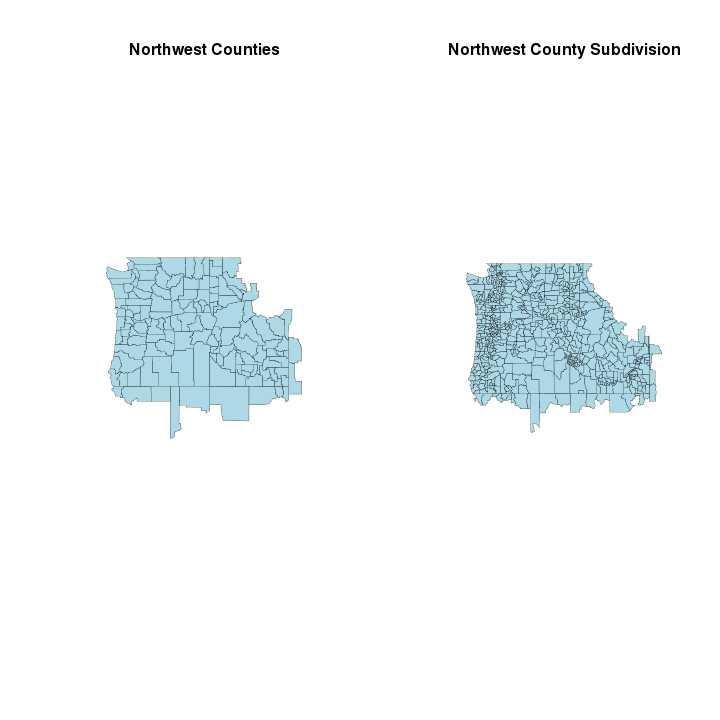

In [5]:
par(mfrow=c(1,2))

plot(inFeaturesA,col="lightblue", lwd=.2, main="Northwest Counties",cex.main=.8)

plot(inFeaturesB,col="lightblue", lwd=.2, main="Northwest County Subdivision",cex.main=.8)

## Generate Neighborhoods for Features

Generate neighborhoods for each feature according to the Queen's Criterion.

In [6]:
#Identify the neighbors of each feature
inFeaturesA.nb <- poly2nb(inFeaturesA ,queen=TRUE)

#Retrieve neighborhood list
inFeaturesA.listb <- nb2listw(inFeaturesA.nb,style="B")
#inFeaturesA.listw <- nb2listw(inFeaturesA.nb,style="W")

In [7]:
#Identify the neighbors of each feature
inFeaturesB.nb <- poly2nb(inFeaturesB ,queen=TRUE)

#Retrieve neighborhood list
inFeaturesB.listb <- nb2listw(inFeaturesB.nb,style="B")
#inFeaturesB.listw <- nb2listw(inFeaturesB.nb,style="W")

## Analysis Variables

Configure Variables to Analyze. Both datasets contain the same set of variables in this case. In this practice, the dependent variable is 'DP0120016' + 'DP0120017' which are the numbers of institutionalized males and females.  'DP0180004' reflect the number of vacant rental units. 

In [8]:
#number of institutionalized males and females
YVarA <- (inFeaturesA$DP0120016 + inFeaturesA$DP0120017)
YVarB <- (inFeaturesB$DP0120016 + inFeaturesB$DP0120017)

In [9]:
YVarA[1:5]

[1]  104  316   64    4 2533

In [10]:
#number of vacant housing units for rent
XVarA <- inFeaturesA$DP0180004
XVarB <- inFeaturesB$DP0180004

In [11]:
XVarA[1:5]

[1]  614  265  319   70 1263

## Poisson Regression

First, conduct a poisson regression for the county and the subdivision datasets using the dependent and independant variables referenced above.

In [12]:
#County Regression
YVarA.basic <- glm(YVarA ~ XVarA, family=poisson)
dispA <- summary(YVarA.basic)$dispersion
summary(YVarA.basic)


Call:
glm(formula = YVarA ~ XVarA, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-65.162  -29.361  -22.197   -1.961  127.036  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 6.478e+00  3.298e-03  1964.3   <2e-16 ***
XVarA       1.300e-04  3.166e-07   410.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 256278  on 137  degrees of freedom
Residual deviance: 167799  on 136  degrees of freedom
AIC: 168792

Number of Fisher Scoring iterations: 6


In [13]:
#Subdivision Regression
YVarB.basic <- glm(YVarB ~ XVarB, family=poisson)
dispB <- summary(YVarB.basic)$dispersion
summary(YVarB.basic)


Call:
glm(formula = YVarB ~ XVarB, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-64.382  -16.420  -16.387   -8.501  165.233  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 4.899e+00  3.298e-03  1485.8   <2e-16 ***
XVarB       3.089e-04  5.633e-07   548.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 463658  on 664  degrees of freedom
Residual deviance: 342386  on 663  degrees of freedom
AIC: 344309

Number of Fisher Scoring iterations: 7


## Evaluate Spatial Autocorrelation

Let's take a look at the modeled residuals.  For the county-based data, spatial autocorrelation appears to not be a problem.  However, for the subdivision-based data, although we might be able to justify accepting the null hypothesis....it is really too close to call.  

In [14]:
#analyze autocorrelation test statistics for residuals
YVarA.basic.res <- residuals(YVarA.basic, type="response")
moran.test(YVarA.basic.res, inFeaturesA.listb)


	Moran I test under randomisation

data:  YVarA.basic.res  
weights: inFeaturesA.listb  

Moran I statistic standard deviate = -0.9101, p-value = 0.8186
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      -0.05096559       -0.00729927        0.00230207 


In [15]:
YVarB.basic.res <- residuals(YVarB.basic, type="response")
moran.test(YVarB.basic.res, inFeaturesB.listb)


	Moran I test under randomisation

data:  YVarB.basic.res  
weights: inFeaturesB.listb  

Moran I statistic standard deviate = 2.3803, p-value = 0.008649
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     0.0497648732     -0.0015060241      0.0004639469 


## Develop an Eigenvector Spatial Filter

Now, let's try to improve upon this base logistic specification and build an Eigenvector spatial filter.

### Generate Eigenvalues and Eigenvectors

The first step is to compute the MBM matrix. Note that matrix B is the spatial weights matrix.

The second step is to generate eigenvalues and eigenvectors that correspond with the dimensions of the input data.

The third step is to do a first cut to weed out eigenvectors that are likely not that relevant for explaining spatial autocorrelation.

We'll have to repeat these tasks for both the county and subdivision data.

In [16]:
#For county data
#compute MBM
n <- length(inFeaturesA)
M <- diag(n) - matrix(1,n,n)/n
B <- listw2mat(inFeaturesA.listb)

MBM <- M %*% B %*% M

#compute eigenvectors and values
Aeig <- eigen(MBM, symmetric=T)

#Select most relevant eigenvectors (first cut)
cutThreshold <- 0.35
AEV <- as.data.frame( Aeig$vectors[ ,Aeig$values/Aeig$values[1] > cutThreshold])
colnames(AEV) <- paste("EV", 1:NCOL(AEV),sep="")

In [17]:
#For county subdivisions data
#compute MBM
n <- length(inFeaturesB)
M <- diag(n) - matrix(1,n,n)/n
B <- listw2mat(inFeaturesB.listb)

MBM <- M %*% B %*% M

#compute eigenvectors and values
Beig <- eigen(MBM, symmetric=T)

#Select most relevant eigenvectors (first cut)
cutThreshold <- 0.35
BEV <- as.data.frame( Beig$vectors[ ,Beig$values/Beig$values[1] > cutThreshold])
colnames(BEV) <- paste("EV", 1:NCOL(BEV),sep="")

### Use Stepwise Regression to Refine Set of Eigenvectors

Refine the set of relevant eigenvectors using step-wise regression. Do this for both the county-level data and the county subdivision-level data. WARNING: The stepwise regression for the subdivision-level data can take a long time on jupyterhub...so, just give it plenty of time to complete.

In [18]:
#FOR COUNTY DATA
#conduct stepwise regression to spatially filter Eigenvectors
#specify full model with all eigenvectors
YVarA.full <- glm(YVarA ~ XVarA + ., data=AEV,family=poisson)
#apply stepwise regression
YVarA.sf <- stepAIC(glm(YVarA~XVarA, data=AEV, family=poisson),scope=list(upper=YVarA.full), direction="forward",k=2.6)
YVarA.sf
Acoefnm <- names(coef(YVarA.sf))

#extract upto exComp components to analyze from final model
exComp <- 7
ctit <- 1
formula2A <- c(YVarA~XVarA)
formlistA <- list()
formula3A <- c()
incnt <- 1
for (ele in Acoefnm)   {
    if ((ctit <= exComp)&& (startsWith(ele,"EV"))) {
        formula2A <- paste(formula2A, "+", sep=" ")
        formula2A <- paste(formula2A, ele, sep=" ")
        s1 = unlist(strsplit(ele, split='EV', fixed=TRUE))[2]
        formlistA[[ctit]] <- as.numeric(s1)
        
        ctit <- ctit + 1
    }
    incnt <- incnt + 1   
}

formula3A <- unlist(formlistA)

Start:  AIC=168792.8
YVarA ~ XVarA

       Df Deviance    AIC
+ EV14  1   153743 154739
+ EV1   1   154461 155457
+ EV25  1   156743 157739
+ EV19  1   158127 159123
+ EV27  1   162798 163795
+ EV6   1   163973 164970
+ EV26  1   164527 165524
+ EV22  1   164636 165633
+ EV21  1   165424 166420
+ EV10  1   165460 166457
+ EV5   1   165581 166577
+ EV15  1   166322 167319
+ EV2   1   166411 167408
+ EV4   1   166610 167607
+ EV8   1   166642 167638
+ EV23  1   166659 167655
+ EV3   1   166771 167767
+ EV17  1   166841 167837
+ EV12  1   167221 168217
+ EV24  1   167438 168435
+ EV9   1   167557 168554
+ EV11  1   167570 168567
+ EV18  1   167645 168641
+ EV16  1   167672 168668
+ EV13  1   167717 168713
+ EV20  1   167776 168773
<none>      167799 168793
+ EV7   1   167797 168793

Step:  AIC=154739.2
YVarA ~ XVarA + EV14

       Df Deviance    AIC
+ EV1   1   141687 142686
+ EV19  1   142767 143766
+ EV25  1   143107 144106
+ EV27  1   149403 150402
+ EV22  1   150308 151307
+ EV5   1  


Step:  AIC=99293.18
YVarA ~ XVarA + EV14 + EV1 + EV19 + EV25 + EV10 + EV27 + EV6 + 
    EV4 + EV26 + EV3 + EV23 + EV8

       Df Deviance   AIC
+ EV5   1    97542 98570
+ EV20  1    97553 98580
+ EV18  1    97582 98610
+ EV9   1    97632 98660
+ EV24  1    97752 98780
+ EV17  1    97804 98832
+ EV21  1    97808 98836
+ EV16  1    97832 98860
+ EV15  1    98023 99050
+ EV22  1    98106 99133
+ EV11  1    98157 99185
+ EV7   1    98248 99276
+ EV12  1    98261 99289
+ EV13  1    98262 99290
<none>       98268 99293
+ EV2   1    98267 99295

Step:  AIC=98569.86
YVarA ~ XVarA + EV14 + EV1 + EV19 + EV25 + EV10 + EV27 + EV6 + 
    EV4 + EV26 + EV3 + EV23 + EV8 + EV5

       Df Deviance   AIC
+ EV18  1    96771 97801
+ EV9   1    96800 97831
+ EV24  1    96894 97925
+ EV20  1    96988 98018
+ EV15  1    97146 98176
+ EV16  1    97171 98202
+ EV21  1    97204 98234
+ EV17  1    97253 98283
+ EV22  1    97331 98361
+ EV11  1    97431 98462
+ EV2   1    97475 98506
+ EV7   1    97509 98539
+ EV


Call:  glm(formula = YVarA ~ XVarA + EV14 + EV1 + EV19 + EV25 + EV10 + 
    EV27 + EV6 + EV4 + EV26 + EV3 + EV23 + EV8 + EV5 + EV18 + 
    EV21 + EV9 + EV15 + EV24 + EV20 + EV22 + EV7 + EV17 + EV12 + 
    EV11 + EV16 + EV13 + EV2, family = poisson, data = AEV)

Coefficients:
(Intercept)        XVarA         EV14          EV1         EV19         EV25  
  5.9668989    0.0001175   -4.3269568   -7.6346974   -4.9428772   -3.8538001  
       EV10         EV27          EV6          EV4         EV26          EV3  
  4.1618770    2.8783032   -2.3556165   -1.1739445   -2.5611100   -1.8144843  
       EV23          EV8          EV5         EV18         EV21          EV9  
 -1.8741572    3.0712459   -1.5336965   -0.9940076   -0.6332094   -0.5305761  
       EV15         EV24         EV20         EV22          EV7         EV17  
 -0.6165122    1.1923849   -0.8196221   -1.0604715   -1.3881754    0.8984927  
       EV12         EV11         EV16         EV13          EV2  
  0.5789922   -0.3171953 

In [19]:
#FOR COUNTY SUBDIVISION DATA
#conduct stepwise regression to spatially filter Eigenvectors
#specify full model with all eigenvectors
YVarB.full <- glm(YVarB ~ XVarB + ., data=BEV,family=poisson)
#apply stepwise regression
YVarB.sf <- stepAIC(glm(YVarB ~ XVarB, data=BEV, family=poisson),scope=list(upper=YVarB.full), direction="forward",k=3.6)
YVarB.sf
Bcoefnm <- names(coef(YVarB.sf))

#extract upto exComp components to analyze from final model
exComp <- 7
ctit <- 1
formula2B <- c(YVarB ~ XVarB)
formlistB <- list()
formula3B <- c()
incnt <- 1
for (ele in Bcoefnm)   {
    if ((ctit <= exComp)&& (startsWith(ele,"EV"))) {
        formula2B <- paste(formula2B, "+", sep=" ")
        formula2B <- paste(formula2B, ele, sep=" ")
        s1 = unlist(strsplit(ele, split='EV', fixed=TRUE))[2]
        formlistB[[ctit]] <- as.numeric(s1)
        
        ctit <- ctit + 1
    }
    incnt <- incnt + 1   
}

formula3B <- unlist(formlistB)

Start:  AIC=344312.2
YVarB ~ XVarB

        Df Deviance    AIC
+ EV59   1   305054 306984
+ EV30   1   316450 318379
+ EV84   1   324475 326404
+ EV61   1   328727 330657
+ EV11   1   331860 333790
+ EV89   1   332000 333930
+ EV62   1   332800 334729
+ EV37   1   333669 335598
+ EV72   1   334252 336182
+ EV3    1   334340 336270
+ EV70   1   334341 336271
+ EV7    1   334504 336433
+ EV120  1   335213 337142
+ EV75   1   335326 337255
+ EV13   1   335583 337513
+ EV78   1   335839 337769
+ EV105  1   335867 337796
+ EV65   1   335996 337925
+ EV104  1   336113 338043
+ EV112  1   336344 338273
+ EV5    1   336513 338443
+ EV119  1   336757 338687
+ EV45   1   336978 338907
+ EV21   1   337495 339424
+ EV12   1   337540 339469
+ EV90   1   337618 339548
+ EV34   1   337672 339601
+ EV117  1   337814 339744
+ EV109  1   337957 339887
+ EV38   1   338217 340147
+ EV2    1   338407 340337
+ EV20   1   338765 340694
+ EV81   1   338876 340805
+ EV22   1   338949 340878
+ EV114  1   338974


Step:  AIC=280168.7
YVarB ~ XVarB + EV59 + EV30 + EV62

        Df Deviance    AIC
+ EV12   1   269309 271249
+ EV72   1   269352 271293
+ EV61   1   269390 271330
+ EV21   1   270070 272010
+ EV84   1   270292 272232
+ EV89   1   270518 272459
+ EV11   1   271796 273736
+ EV70   1   272037 273978
+ EV37   1   272303 274243
+ EV110  1   272739 274679
+ EV3    1   272762 274702
+ EV65   1   272998 274938
+ EV32   1   273338 275278
+ EV105  1   273775 275715
+ EV20   1   274369 276310
+ EV14   1   274499 276439
+ EV5    1   274784 276725
+ EV120  1   274874 276814
+ EV9    1   274928 276868
+ EV13   1   275112 277053
+ EV81   1   275325 277265
+ EV17   1   275373 277313
+ EV98   1   275520 277460
+ EV117  1   275599 277539
+ EV33   1   275889 277830
+ EV119  1   276071 278012
+ EV49   1   276116 278056
+ EV101  1   276128 278069
+ EV112  1   276157 278098
+ EV36   1   276218 278158
+ EV75   1   276310 278250
+ EV41   1   276385 278325
+ EV60   1   276434 278375
+ EV63   1   276438 27837


Step:  AIC=255851.6
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37

        Df Deviance    AIC
+ EV70   1   248082 250033
+ EV3    1   248190 250141
+ EV84   1   248206 250157
+ EV13   1   248800 250751
+ EV110  1   249335 251286
+ EV104  1   249373 251324
+ EV21   1   249463 251414
+ EV98   1   249910 251861
+ EV11   1   250245 252196
+ EV72   1   250305 252256
+ EV61   1   250490 252441
+ EV14   1   250695 252646
+ EV101  1   250889 252840
+ EV73   1   251191 253142
+ EV9    1   251258 253209
+ EV65   1   251522 253473
+ EV81   1   251623 253574
+ EV20   1   251642 253593
+ EV32   1   251671 253622
+ EV120  1   251730 253681
+ EV83   1   252013 253965
+ EV105  1   252104 254055
+ EV88   1   252218 254169
+ EV66   1   252240 254191
+ EV117  1   252304 254255
+ EV38   1   252355 254307
+ EV75   1   252400 254352
+ EV18   1   252446 254397
+ EV17   1   252567 254518
+ EV119  1   252600 254552
+ EV19   1   252634 254586
+ EV5    1   252636 254588
+ EV6    1   252745 254696
+ EV


Step:  AIC=238929.1
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84

        Df Deviance    AIC
+ EV13   1   232126 234088
+ EV21   1   232243 234205
+ EV110  1   233458 235420
+ EV98   1   233835 235797
+ EV83   1   233860 235822
+ EV72   1   234024 235986
+ EV9    1   234126 236088
+ EV61   1   234230 236192
+ EV101  1   234244 236206
+ EV120  1   234365 236327
+ EV104  1   234496 236458
+ EV17   1   234936 236898
+ EV60   1   235051 237013
+ EV11   1   235067 237029
+ EV73   1   235249 237211
+ EV4    1   235269 237231
+ EV14   1   235357 237319
+ EV69   1   235369 237331
+ EV32   1   235374 237336
+ EV105  1   235514 237476
+ EV88   1   235560 237522
+ EV65   1   235572 237534
+ EV5    1   235582 237544
+ EV117  1   235633 237595
+ EV57   1   235651 237613
+ EV68   1   235726 237688
+ EV81   1   235730 237692
+ EV56   1   235742 237704
+ EV38   1   235785 237747
+ EV87   1   235910 237872
+ EV50   1   235992 237954
+ EV42   1   236026 237988
+ EV58


Step:  AIC=227149.1
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83

        Df Deviance    AIC
+ EV120  1   221745 223717
+ EV11   1   222045 224018
+ EV101  1   222493 224466
+ EV61   1   222656 224629
+ EV21   1   222709 224682
+ EV110  1   223013 224986
+ EV117  1   223155 225128
+ EV72   1   223198 225171
+ EV17   1   223359 225331
+ EV9    1   223367 225339
+ EV60   1   223495 225468
+ EV88   1   223681 225654
+ EV104  1   223799 225771
+ EV14   1   223941 225913
+ EV69   1   224123 226096
+ EV41   1   224190 226163
+ EV81   1   224221 226194
+ EV42   1   224237 226209
+ EV56   1   224300 226273
+ EV119  1   224330 226303
+ EV33   1   224388 226361
+ EV68   1   224402 226374
+ EV65   1   224431 226404
+ EV99   1   224437 226410
+ EV38   1   224450 226423
+ EV32   1   224510 226483
+ EV5    1   224512 226485
+ EV109  1   224522 226495
+ EV93   1   224555 226528
+ EV4    1   224582 226555
+ EV57   1   224599 226571
+ EV50   1  


Step:  AIC=217688.5
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61

        Df Deviance    AIC
+ EV88   1   213392 215375
+ EV101  1   213461 215444
+ EV21   1   213664 215647
+ EV119  1   213791 215774
+ EV60   1   213892 215875
+ EV72   1   213962 215945
+ EV9    1   214035 216019
+ EV110  1   214117 216100
+ EV42   1   214214 216198
+ EV58   1   214382 216365
+ EV104  1   214530 216514
+ EV117  1   214629 216613
+ EV41   1   214776 216759
+ EV50   1   214810 216793
+ EV65   1   214850 216833
+ EV32   1   214888 216872
+ EV40   1   214913 216896
+ EV18   1   214971 216954
+ EV68   1   214999 216982
+ EV99   1   215060 217044
+ EV4    1   215077 217061
+ EV17   1   215084 217068
+ EV69   1   215087 217070
+ EV105  1   215094 217078
+ EV93   1   215094 217078
+ EV77   1   215131 217115
+ EV56   1   215136 217119
+ EV7    1   215152 217136
+ EV87   1   215154 217138
+ EV78   1   215164 217147
+ EV76   1   2151


Step:  AIC=211508.7
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19

        Df Deviance    AIC
+ EV72   1   207449 209443
+ EV101  1   207691 209686
+ EV119  1   207952 209946
+ EV58   1   207993 209988
+ EV110  1   208042 210036
+ EV60   1   208193 210188
+ EV117  1   208211 210206
+ EV50   1   208296 210290
+ EV65   1   208482 210476
+ EV9    1   208531 210525
+ EV109  1   208622 210616
+ EV76   1   208686 210680
+ EV7    1   208689 210683
+ EV8    1   208715 210709
+ EV78   1   208799 210793
+ EV49   1   208812 210807
+ EV104  1   208817 210811
+ EV4    1   208826 210820
+ EV68   1   208906 210900
+ EV93   1   208907 210901
+ EV41   1   208918 210912
+ EV90   1   208929 210923
+ EV38   1   208937 210931
+ EV51   1   208953 210948
+ EV40   1   208963 210957
+ EV33   1   208966 210960
+ EV107  1   208979 210973
+ EV69   1   208979 210974
+ EV17   1   208996 210991
+ EV75   1   20901


Step:  AIC=205317.2
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101

        Df Deviance    AIC
+ EV9    1   201882 203887
+ EV50   1   202194 204199
+ EV8    1   202196 204201
+ EV7    1   202266 204271
+ EV90   1   202267 204272
+ EV40   1   202302 204307
+ EV78   1   202337 204342
+ EV110  1   202349 204354
+ EV60   1   202429 204434
+ EV58   1   202495 204500
+ EV41   1   202527 204532
+ EV27   1   202669 204674
+ EV51   1   202688 204693
+ EV69   1   202699 204704
+ EV68   1   202703 204708
+ EV117  1   202703 204709
+ EV65   1   202716 204721
+ EV104  1   202749 204754
+ EV23   1   202775 204780
+ EV56   1   202796 204801
+ EV33   1   202815 204820
+ EV92   1   202819 204824
+ EV75   1   202833 204838
+ EV18   1   202849 204854
+ EV4    1   202850 204855
+ EV42   1   202854 204859
+ EV35   1   202859 204864
+ EV109  1   202873 204878
+ EV103  1   202900 20


Step:  AIC=201008.6
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7

        Df Deviance    AIC
+ EV27   1   197917 199933
+ EV40   1   197928 199944
+ EV110  1   198146 200162
+ EV42   1   198163 200179
+ EV78   1   198179 200195
+ EV74   1   198263 200279
+ EV8    1   198290 200306
+ EV90   1   198313 200329
+ EV69   1   198345 200361
+ EV33   1   198346 200362
+ EV68   1   198350 200366
+ EV92   1   198401 200417
+ EV14   1   198413 200429
+ EV117  1   198430 200446
+ EV75   1   198437 200453
+ EV103  1   198462 200478
+ EV39   1   198469 200485
+ EV24   1   198474 200490
+ EV109  1   198480 200496
+ EV18   1   198485 200501
+ EV77   1   198504 200520
+ EV104  1   198528 200544
+ EV41   1   198534 200550
+ EV50   1   198550 200566
+ EV51   1   198571 200587
+ EV60   1   198576 200592
+ EV56   1   198603 200618
+ EV35   1   198607 200622
+ E


Step:  AIC=198048.7
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40

        Df Deviance    AIC
+ EV90   1   195071 197098
+ EV117  1   195281 197308
+ EV78   1   195285 197312
+ EV69   1   195306 197333
+ EV103  1   195395 197421
+ EV74   1   195464 197491
+ EV38   1   195465 197492
+ EV18   1   195515 197542
+ EV68   1   195527 197554
+ EV42   1   195543 197570
+ EV17   1   195544 197571
+ EV75   1   195560 197587
+ EV14   1   195562 197589
+ EV1    1   195583 197609
+ EV33   1   195588 197615
+ EV111  1   195591 197617
+ EV109  1   195592 197619
+ EV104  1   195592 197619
+ EV77   1   195597 197623
+ EV24   1   195612 197639
+ EV41   1   195626 197652
+ EV8    1   195629 197656
+ EV118  1   195646 197673
+ EV95   1   195654 197680
+ EV35   1   195662 197688
+ EV50   1   195663 197689
+ EV53   1   195667 197694
+ E


Step:  AIC=195402.6
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103

        Df Deviance    AIC
+ EV117  1   192508 194545
+ EV38   1   192609 194646
+ EV69   1   192669 194706
+ EV35   1   192760 194797
+ EV42   1   192761 194799
+ EV95   1   192783 194821
+ EV111  1   192785 194822
+ EV24   1   192805 194843
+ EV104  1   192821 194858
+ EV14   1   192828 194865
+ EV33   1   192872 194909
+ EV74   1   192904 194941
+ EV93   1   192919 194957
+ EV75   1   192920 194958
+ EV56   1   192921 194959
+ EV1    1   192934 194972
+ EV77   1   192943 194981
+ EV8    1   192992 195030
+ EV109  1   192997 195035
+ EV17   1   193009 195047
+ EV22   1   193022 195059
+ EV121  1   193043 195080
+ EV60   1   193046 195083
+ EV114  1   193055 195092
+ EV50   1   193060 195097
+ EV76   1   193081 195119
+ EV68  


Step:  AIC=192871.1
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38

        Df Deviance    AIC
+ EV74   1   189994 192043
+ EV24   1   190103 192151
+ EV69   1   190123 192172
+ EV75   1   190124 192172
+ EV114  1   190200 192248
+ EV56   1   190219 192268
+ EV60   1   190236 192285
+ EV41   1   190280 192328
+ EV33   1   190288 192337
+ EV14   1   190289 192337
+ EV95   1   190321 192369
+ EV42   1   190339 192388
+ EV111  1   190360 192408
+ EV47   1   190383 192431
+ EV121  1   190408 192456
+ EV50   1   190423 192471
+ EV54   1   190432 192480
+ EV8    1   190432 192481
+ EV99   1   190443 192492
+ EV92   1   190447 192495
+ EV17   1   190511 192559
+ EV18   1   190516 192564
+ EV77   1   190550 192598
+ EV68   1   190559 192607
+ EV1    1   190572 192620
+ EV25   1   


Step:  AIC=190365.7
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114

        Df Deviance    AIC
+ EV75   1   187587 189646
+ EV42   1   187649 189708
+ EV41   1   187679 189738
+ EV95   1   187700 189759
+ EV24   1   187768 189827
+ EV77   1   187783 189842
+ EV111  1   187889 189948
+ EV54   1   187896 189955
+ EV50   1   187907 189967
+ EV14   1   187922 189981
+ EV121  1   187943 190002
+ EV33   1   187950 190009
+ EV8    1   187958 190017
+ EV60   1   187959 190018
+ EV17   1   187959 190018
+ EV99   1   187964 190023
+ EV56   1   187992 190051
+ EV47   1   187999 190059
+ EV92   1   188005 190064
+ EV68   1   188016 190075
+ EV18   1   188023 190082
+ EV93   1   188035 190094
+ EV25   1   188039 190098
+ EV65   1   188045 190104
+ EV82   1   

        Df Deviance    AIC
+ EV92   1   185505 187575
+ EV121  1   185513 187583
+ EV18   1   185552 187622
+ EV50   1   185556 187626
+ EV14   1   185576 187646
+ EV1    1   185592 187662
+ EV41   1   185626 187696
+ EV8    1   185636 187706
+ EV111  1   185680 187750
+ EV99   1   185692 187762
+ EV60   1   185698 187768
+ EV17   1   185703 187773
+ EV32   1   185710 187780
+ EV77   1   185713 187783
+ EV56   1   185721 187791
+ EV5    1   185728 187798
+ EV33   1   185729 187799
+ EV109  1   185740 187810
+ EV108  1   185741 187811
+ EV82   1   185742 187812
+ EV25   1   185752 187822
+ EV24   1   185766 187836
+ EV65   1   185766 187836
+ EV118  1   185777 187847
+ EV68   1   185783 187853
+ EV47   1   185786 187856
+ EV28   1   185786 187856
+ EV20   1   185823 187893
+ EV106  1   185829 187899
+ EV43   1   185830 187900
+ EV93   1   185852 187922
+ EV22   1   185859 187929
+ EV52   1   185879 187949
+ EV73   1   185886 187956
+ EV116  1   185887 187956
+ EV51   1   185890 187960
+


Step:  AIC=186239.8
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121

        Df Deviance    AIC
+ EV68   1   183738 185823
+ EV111  1   183739 185823
+ EV17   1   183745 185829
+ EV25   1   183823 185908
+ EV32   1   183828 185913
+ EV24   1   183844 185928
+ EV60   1   183846 185930
+ EV77   1   183857 185941
+ EV82   1   183857 185941
+ EV93   1   183866 185951
+ EV108  1   183877 185962
+ EV65   1   183888 185972
+ EV1    1   183900 185984
+ EV99   1   183912 185996
+ EV41   1   183917 186002
+ EV56   1   183925 186010
+ EV5    1   183928 186012
+ EV18   1   183946 186030
+ EV33   1   183956 186040
+ EV52   1   183968 186052
+ EV43   1   183973 186057
+ EV109  1   183973 186057
+ EV8    1  


Step:  AIC=184428.8
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17

        Df Deviance    AIC
+ EV28   1   181966 184065
+ EV1    1   182007 184106
+ EV18   1   182008 184107
+ EV32   1   182048 184147
+ EV56   1   182067 184165
+ EV93   1   182080 184179
+ EV65   1   182088 184186
+ EV24   1   182100 184198
+ EV8    1   182102 184201
+ EV33   1   182105 184203
+ EV99   1   182114 184212
+ EV109  1   182116 184215
+ EV52   1   182133 184232
+ EV25   1   182145 184243
+ EV118  1   182146 184245
+ EV82   1   182154 184253
+ EV49   1   182158 184257
+ EV5    1   182165 184263
+ EV43   1   182167 184265
+ EV20   1   182169 184268
+ EV31   1   182169 184268
+ EV60   1


Step:  AIC=183100.9
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56

        Df Deviance    AIC
+ EV1    1   180651 182764
+ EV93   1   180708 182821
+ EV65   1   180722 182835
+ EV76   1   180723 182836
+ EV31   1   180733 182846
+ EV52   1   180738 182851
+ EV82   1   180741 182855
+ EV20   1   180762 182875
+ EV5    1   180766 182879
+ EV109  1   180769 182882
+ EV33   1   180774 182888
+ EV8    1   180781 182894
+ EV29   1   180789 182902
+ EV118  1   180797 182910
+ EV49   1   180804 182917
+ EV24   1   180825 182938
+ EV60   1   180825 182939
+ EV18   1   180830 182944
+ EV6    1   180862 182975
+ EV15   1   180871 182984
+ EV


Step:  AIC=181699
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15

        Df Deviance    AIC
+ EV8    1   179212 181340
+ EV93   1   179270 181398
+ EV20   1   179289 181416
+ EV18   1   179311 181439
+ EV109  1   179323 181450
+ EV76   1   179337 181465
+ EV52   1   179352 181480
+ EV24   1   179361 181488
+ EV60   1   179361 181489
+ EV49   1   179368 181495
+ EV5    1   179386 181514
+ EV29   1   179400 181528
+ EV6    1   179410 181538
+ EV106  1   179415 181543
+ EV45   1   179416 181544
+ EV33   1   179439 181567
+ EV47   1   179443 181571
+ EV82   1   179448 181575
+ EV54   1   179456 181584
+ EV96


Step:  AIC=180116.9
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76

        Df Deviance    AIC
+ EV93   1   177650 179792
+ EV52   1   177667 179809
+ EV109  1   177727 179869
+ EV60   1   177737 179879
+ EV24   1   177778 179920
+ EV29   1   177780 179922
+ EV2    1   177783 179925
+ EV96   1   177794 179936
+ EV33   1   177797 179939
+ EV20   1   177806 179948
+ EV118  1   177810 179952
+ EV6    1   177836 179978
+ EV43   1   177843 179985
+ EV106  1   177844 179986
+ EV79   1   177847 179989
+ EV49   1   177853 179995
+ EV47   1   177862 180004
+ EV112  1   177880 180022



Step:  AIC=179010.6
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6

        Df Deviance    AIC
+ EV106  1   176672 178829
+ EV109  1   176683 178839
+ EV16   1   176688 178844
+ EV43   1   176702 178859
+ EV96   1   176709 178865
+ EV94   1   176720 178876
+ EV33   1   176725 178881
+ EV2    1   176730 178886
+ EV41   1   176730 178887
+ EV49   1   176731 178888
+ EV29   1   176736 178893
+ EV60   1   176738 178895
+ EV47   1   176741 178897
+ EV79   1   176747 178903
+ EV20   1   176751 178908
+ EV24   1   176759 178915
+ EV54   1   176766 178922


Step:  AIC=178326.2
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29

        Df Deviance    AIC
+ EV63   1   175959 178130
+ EV43   1   175993 178163
+ EV24   1   176006 178176
+ EV96   1   176014 178185
+ EV94   1   176018 178188
+ EV33   1   176027 178198
+ EV41   1   176039 178210
+ EV60   1   176043 178213
+ EV2    1   176044 178214
+ EV54   1   176053 178224
+ EV79   1   176057 178228
+ EV44   1   176058 178229
+ EV20   1   176058 178229
+ EV108  1   176066 178237
+ EV48   1   176080 178251
+ EV97   1   17608


Step:  AIC=177616.9
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29 + EV63 + EV24 + EV43 + EV48

        Df Deviance    AIC
+ EV94   1   175261 177446
+ EV20   1   175293 177479
+ EV44   1   175301 177486
+ EV49   1   175305 177490
+ EV79   1   175312 177498
+ EV33   1   175314 177499
+ EV82   1   175322 177507
+ EV22   1   175328 177513
+ EV97   1   175331 177516
+ EV96   1   175341 177526
+ EV67   1   175347 177532
+ EV2    1   175352 177537
+ EV39   1   175354 177539
+ EV85   1   175360 177545
+ EV45   1   1753

        Df Deviance    AIC
+ EV79   1   174642 176842
+ EV97   1   174642 176842
+ EV33   1   174649 176848
+ EV39   1   174658 176858
+ EV20   1   174669 176869
+ EV41   1   174675 176875
+ EV108  1   174678 176878
+ EV82   1   174684 176883
+ EV22   1   174684 176884
+ EV44   1   174696 176896
+ EV54   1   174705 176905
+ EV10   1   174727 176927
+ EV85   1   174733 176932
+ EV112  1   174735 176934
+ EV55   1   174741 176941
+ EV60   1   174743 176942
+ EV113  1   174745 176944
+ EV96   1   174747 176947
+ EV123  1   174748 176948
+ EV46   1   174750 176950
+ EV25   1   174751 176951
+ EV57   1   174753 176953
+ EV45   1   174756 176956
+ EV34   1   174758 176957
+ EV73   1   174760 176960
+ EV87   1   174760 176960
+ EV51   1   174765 176965
+ EV47   1   174767 176966
+ EV71   1   174775 176974
+ EV26   1   174775 176975
+ EV115  1   174775 176975
+ EV102  1   174776 176975
+ EV66   1   174776 176976
+ EV122  1   174778 176977
+ EV91   1   174778 176978
+ EV64   1   174779 176978
+


Step:  AIC=176346.5
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29 + EV63 + EV24 + EV43 + EV48 + EV94 + EV49 + EV67 + EV2 + 
    EV79 + EV39 + EV20 + EV33 + EV54

        Df Deviance    AIC
+ EV22   1   174025 176243
+ EV108  1   174031 176249
+ EV44   1   174032 176250
+ EV10   1   174041 176258
+ EV97   1   174041 176258
+ EV45   1   174057 176275
+ EV57   1   174061 176279
+ EV51   1   174067 176285
+ EV82   1   174068 176286
+ EV96   1   174073 176291
+ EV46   1   174077 176295
+ EV87   1   174081 176298
+ EV


Step:  AIC=175872.3
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29 + EV63 + EV24 + EV43 + EV48 + EV94 + EV49 + EV67 + EV2 + 
    EV79 + EV39 + EV20 + EV33 + EV54 + EV22 + EV10 + EV57 + EV44 + 
    EV96

        Df Deviance    AIC
+ EV87   1   173542 175777
+ EV97   1   173557 175793
+ EV108  1   173563 175799
+ EV41   1   173587 175823
+ EV82   1   173590 175825
+ EV100  1   173591 175826
+ EV55   1   173591 175827
+ EV47   1   173597 175833
+ EV113  1   173601 175836
+ EV123  1   173604 175840
+ EV34   1   17360


Step:  AIC=175512.8
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29 + EV63 + EV24 + EV43 + EV48 + EV94 + EV49 + EV67 + EV2 + 
    EV79 + EV39 + EV20 + EV33 + EV54 + EV22 + EV10 + EV57 + EV44 + 
    EV96 + EV87 + EV97 + EV108 + EV113 + EV82

        Df Deviance    AIC
+ EV55   1   173208 175462
+ EV86   1   173217 175470
+ EV47   1   173217 175470
+ EV112  1   173217 175471
+ EV45   1   173221 175475
+ EV105  1   173232 175485
+ EV41   1   173234 175487
+ EV34   1   173235 175489
+ EV81   1   173238 175492
+ EV46  

        Df Deviance    AIC
+ EV41   1   172935 175206
+ EV81   1   172938 175209
+ EV85   1   172938 175210
+ EV86   1   172941 175212
+ EV46   1   172945 175216
+ EV91   1   172949 175221
+ EV36   1   172952 175223
+ EV34   1   172953 175224
+ EV100  1   172955 175226
+ EV23   1   172957 175229
+ EV102  1   172960 175231
+ EV123  1   172961 175233
+ EV51   1   172961 175233
+ EV122  1   172963 175234
+ EV53   1   172964 175235
+ EV64   1   172965 175236
+ EV80   1   172967 175239
<none>       172972 175240
+ EV115  1   172970 175241
+ EV26   1   172970 175241
+ EV107  1   172970 175242
+ EV66   1   172970 175242
+ EV4    1   172971 175242
+ EV71   1   172971 175243
+ EV25   1   172971 175243
+ EV73   1   172972 175243
+ EV60   1   172972 175243
+ EV116  1   172972 175243
+ EV104  1   172972 175243

Step:  AIC=175206.1
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV


Step:  AIC=175044.1
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29 + EV63 + EV24 + EV43 + EV48 + EV94 + EV49 + EV67 + EV2 + 
    EV79 + EV39 + EV20 + EV33 + EV54 + EV22 + EV10 + EV57 + EV44 + 
    EV96 + EV87 + EV97 + EV108 + EV113 + EV82 + EV55 + EV112 + 
    EV105 + EV47 + EV45 + EV41 + EV46 + EV81 + EV85 + EV86 + 
    EV36

        Df Deviance    AIC
+ EV51   1   172738 175031
+ EV100  1   172740 175033
+ EV115  1   172740 175033
+ EV23   1   172743 175036
+ EV123  1   172744 175037
+ EV107  1   172745 175038



Step:  AIC=174982.9
YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + EV37 + EV70 + 
    EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + EV61 + EV88 + 
    EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + EV58 + EV7 + EV27 + 
    EV110 + EV40 + EV90 + EV78 + EV103 + EV117 + EV35 + EV38 + 
    EV74 + EV69 + EV114 + EV75 + EV42 + EV95 + EV92 + EV14 + 
    EV50 + EV121 + EV68 + EV77 + EV111 + EV17 + EV28 + EV32 + 
    EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + EV8 + EV18 + EV5 + 
    EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + EV109 + EV16 + 
    EV29 + EV63 + EV24 + EV43 + EV48 + EV94 + EV49 + EV67 + EV2 + 
    EV79 + EV39 + EV20 + EV33 + EV54 + EV22 + EV10 + EV57 + EV44 + 
    EV96 + EV87 + EV97 + EV108 + EV113 + EV82 + EV55 + EV112 + 
    EV105 + EV47 + EV45 + EV41 + EV46 + EV81 + EV85 + EV86 + 
    EV36 + EV51 + EV100 + EV107 + EV115 + EV53 + EV60

        Df Deviance    AIC
+ EV23   1   172662 174976
+ EV123  1   172665 174979
+ EV122  1   172667 174982
<none>       172672 174983
+ EV91   


Call:  glm(formula = YVarB ~ XVarB + EV59 + EV30 + EV62 + EV12 + EV89 + 
    EV37 + EV70 + EV3 + EV84 + EV13 + EV98 + EV83 + EV120 + EV11 + 
    EV61 + EV88 + EV21 + EV19 + EV72 + EV119 + EV101 + EV9 + 
    EV58 + EV7 + EV27 + EV110 + EV40 + EV90 + EV78 + EV103 + 
    EV117 + EV35 + EV38 + EV74 + EV69 + EV114 + EV75 + EV42 + 
    EV95 + EV92 + EV14 + EV50 + EV121 + EV68 + EV77 + EV111 + 
    EV17 + EV28 + EV32 + EV99 + EV56 + EV1 + EV65 + EV31 + EV15 + 
    EV8 + EV18 + EV5 + EV76 + EV93 + EV52 + EV118 + EV6 + EV106 + 
    EV109 + EV16 + EV29 + EV63 + EV24 + EV43 + EV48 + EV94 + 
    EV49 + EV67 + EV2 + EV79 + EV39 + EV20 + EV33 + EV54 + EV22 + 
    EV10 + EV57 + EV44 + EV96 + EV87 + EV97 + EV108 + EV113 + 
    EV82 + EV55 + EV112 + EV105 + EV47 + EV45 + EV41 + EV46 + 
    EV81 + EV85 + EV86 + EV36 + EV51 + EV100 + EV107 + EV115 + 
    EV53 + EV60 + EV23 + EV122 + EV123 + EV91 + EV25, family = poisson, 
    data = BEV)

Coefficients:
(Intercept)        XVarB         EV59         EV30 

### Given the selected Eigenvectors, run the spatially filtered model

Run the spatially filtered data for both the county-level and county subdivision level datasets. Here are some things to note. In the county level model, the null (deviance only associated with the intercept) did not change from the basic model, but the residual deviance and the associated degrees of freedom did decrease considerably with the incorporation of a spatial filter.  Also, the overall deviance of the model decreased significantly with the inclusion of the spatial filter.  

For the subdivision-level data, the residual deviance and degrees of freedom were too positively impacted by the spatial filter, decreasing considerably.  Also, the overall deviance decreased as well.

In [21]:
#for county data
#populate model with selected Eigenvectors
YVarA.sf <- glm(formula2A, data=AEV, family=poisson)
summary(YVarA.sf)

paste("Deviance Base Model = ",summary(YVarA.basic)$deviance/YVarA.basic$df.residual)
paste("Deviance Spatial Filter = ",summary(YVarA.sf)$deviance/YVarA.sf$df.residual)
paste("Dispersion = ",summary(YVarA.sf)$dispersion)


Call:
glm(formula = formula2A, family = poisson, data = AEV)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-56.879  -20.531  -12.489    4.623  102.621  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.149e+00  4.308e-03 1427.50   <2e-16 ***
XVarA        1.219e-04  4.995e-07  244.01   <2e-16 ***
EV14        -4.255e+00  3.543e-02 -120.07   <2e-16 ***
EV1         -4.878e+00  4.416e-02 -110.45   <2e-16 ***
EV19        -4.347e+00  4.237e-02 -102.61   <2e-16 ***
EV25        -3.091e+00  3.335e-02  -92.68   <2e-16 ***
EV10         2.815e+00  3.902e-02   72.16   <2e-16 ***
EV27         1.969e+00  3.494e-02   56.35   <2e-16 ***
EV6         -2.308e+00  4.363e-02  -52.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 256278  on 137  degrees of freedom
Residual deviance: 109375  on 129  degrees of freedom
AIC: 110381

Number of Fis

[1] "Deviance Base Model =  1233.81593770342"

[1] "Deviance Spatial Filter =  847.866389887098"

[1] "Dispersion =  1"

In [22]:
#for county subdivision data
#populate model with selected Eigenvectors
YVarB.sf <- glm(formula2B, data=BEV, family=poisson)
summary(YVarB.sf)

paste("Deviance Base Model = ",summary(YVarB.basic)$deviance/YVarB.basic$df.residual)
paste("Deviance Spatial Filter = ",summary(YVarB.sf)$deviance/YVarB.sf$df.residual)
paste("Dispersion = ",summary(YVarB.sf)$dispersion)


Call:
glm(formula = formula2B, family = poisson, data = BEV)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-37.641  -14.456  -10.433   -3.602  103.929  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.413e+00  4.520e-03  976.44   <2e-16 ***
XVarB        4.634e-04  1.090e-06  425.25   <2e-16 ***
EV59         1.023e+01  6.170e-02  165.76   <2e-16 ***
EV30         1.008e+01  6.886e-02  146.40   <2e-16 ***
EV62         8.793e+00  8.614e-02  102.08   <2e-16 ***
EV12        -7.275e+00  7.025e-02 -103.56   <2e-16 ***
EV89         6.894e+00  7.978e-02   86.42   <2e-16 ***
EV37         7.118e+00  8.732e-02   81.52   <2e-16 ***
EV70        -6.687e+00  8.664e-02  -77.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 463658  on 664  degrees of freedom
Residual deviance: 248082  on 656  degrees of freedom
AIC: 250018

Number of Fis

[1] "Deviance Base Model =  516.419774293024"

[1] "Deviance Spatial Filter =  378.173265735361"

[1] "Dispersion =  1"

### Assess the Residuals for Spatial Autocorrelation

Test the residuals of each of the models for spatial autocorrelation. In both the county and subdivision models, the null hypothesis cannot be rejected, and thus, the spatial filter effectively removed the impact of spatial autocorrelation.

In [25]:
#FOR COUNTY DATA
#analyze autocorrelation test statistics for residuals
YVarA.sf.res <- residuals(YVarA.sf, type="response")

moran.test(YVarA.sf.res, inFeaturesA.listb)


	Moran I test under randomisation

data:  YVarA.sf.res  
weights: inFeaturesA.listb  

Moran I statistic standard deviate = -3.4848, p-value = 0.9998
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     -0.176619321      -0.007299270       0.002360821 


In [26]:
geary.test(YVarA.sf.res, inFeaturesA.listb)


	Geary C test under randomisation

data:  YVarA.sf.res 
weights: inFeaturesA.listb 

Geary C statistic standard deviate = -2.4308, p-value = 0.9925
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
      1.223218511       1.000000000       0.008432615 


In [27]:
#FOR COUNTY SUBDIVISIONS
#analyze autocorrelation test statistics for residuals
YVarB.sf.res <- residuals(YVarB.sf, type="response")

moran.test(YVarB.sf.res, inFeaturesB.listb)


	Moran I test under randomisation

data:  YVarB.sf.res  
weights: inFeaturesB.listb  

Moran I statistic standard deviate = -2.9623, p-value = 0.9985
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
    -0.0668991569     -0.0015060241      0.0004873064 


In [28]:
geary.test(YVarB.sf.res, inFeaturesB.listb)


	Geary C test under randomisation

data:  YVarB.sf.res 
weights: inFeaturesB.listb 

Geary C statistic standard deviate = -2.8012, p-value = 0.9975
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
      1.219512189       1.000000000       0.006141065 


### Compare the Predictions

Compare the predicted values of the spatially filtered county and subdivision level models. Take some time to reflect upon the similarities and differences that can be found and try to understand why they might occur.  For example, the subdivision data are clearly of a higher spatial resolution, with many more polygons representing the region than is done with the county level data.  As such, we can expect greater variations in the predicted values, especially in the areas covered by smaller subdivisions.  This representation allows us to see the influence of the more densely populated areas of the region. The counties, being more general, represent a geographic smoothing of the subdivision level data. 

Which is the correct model or is there a correct model? That depends on how you believe the processes affecting the variable of interest is scaled in the region. That is, is the process larger scale associated with greater areas of the landscape? Or is it a smaller scale process, one that can vary more dramatically over smaller geographies?  At any rate, don't blame me for this... MAUP did it!.

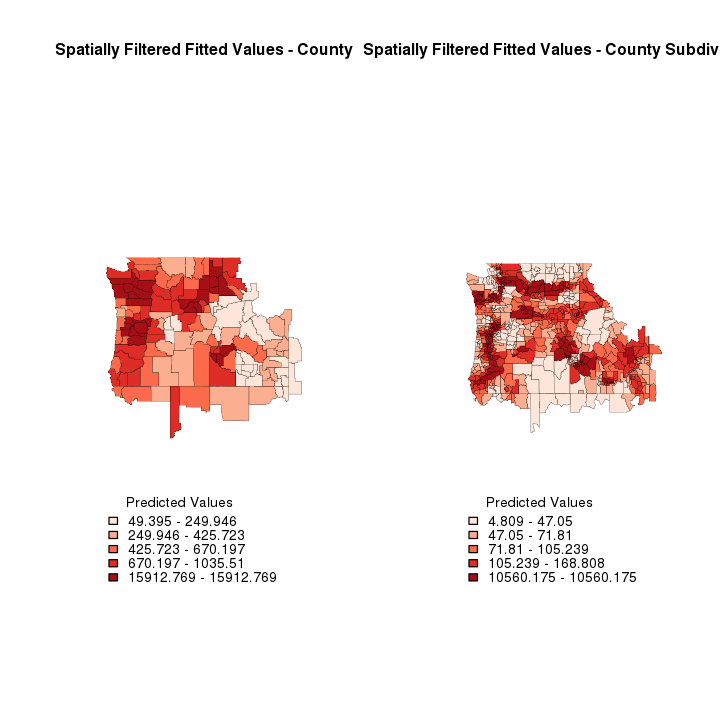

In [29]:
par(mfrow=c(1,2))
#FOR COUNTY DATA
#classify the variable
numcat <- 5
cate <- classIntervals(YVarA.sf$fitted, numcat, style="quantile")

#assign colors to categories
pal <- brewer.pal(numcat,"Reds")
cols <- findColours(cate,pal)

#plot values
plot(inFeaturesA, col=cols, lwd=.2,main="Spatially Filtered Fitted Values - County",cex.main=.8)
brks <- round(cate$brks,3)
leg <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft", fill=pal, legend=leg, bty="n",title="Predicted Values",cex=.7)

# ------------------------------------------------------------------------

#FOR COUNTY SUBDIVISIONS DATA
#classify the variable
numcat <- 5
cate <- classIntervals(YVarB.sf$fitted, numcat, style="quantile")

#assign colors to categories
pal <- brewer.pal(numcat,"Reds")
cols <- findColours(cate,pal)

#plot values
plot(inFeaturesB, col=cols, lwd=.2,main="Spatially Filtered Fitted Values - County Subdivisions",cex.main=.8)
brks <- round(cate$brks,3)
leg <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft", fill=pal, legend=leg, bty="n",title="Predicted Values",cex=.7)